## Assignment-5(abhishek vidhate; 21BCE11373)

i used kaggle notebook , as didn't had to download the dataset and comes with all the libraries installed and i just have to import them

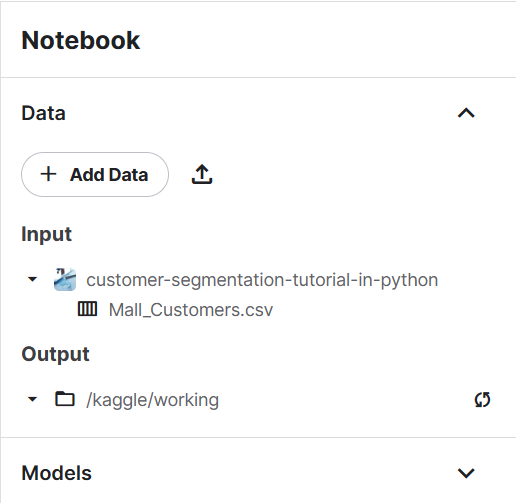

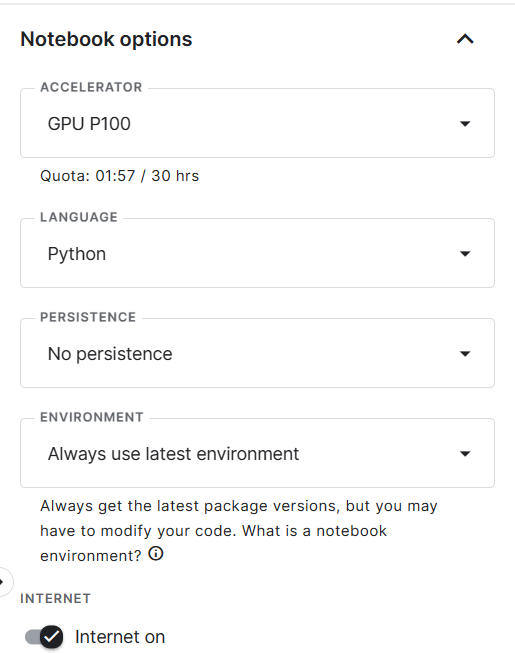

### Market Basket Magic: Extracting Insights for Retail Success


* Customer segmentation is a crucial aspect of retail and marketing strategy. 
* Mall Customer Segmentation is a common data analysis project that involves categorizing mall customers into distinct groups or segments based on various characteristics and behaviors. 
* This segmentation is valuable for tailoring marketing efforts, optimizing store layouts, and enhancing customer experiences.

## TASK : DATA PREPROCESSING

IMPORTS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mall = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

### general info and datatype about mall.csv

In [3]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mall.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
mall .isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

good no missing values

**so no need :**
* to perform data preprocessing 
* handling missing data with imputers(KNN/Simple imputer)
* fill missing categorical data 
* feature engineering ; as data is simple and this is not needed

###  lets convert male/female data in numercial data with encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
mall['Gender'] = label_encoder.fit_transform(mall['Gender'])

In [8]:
mall.head()  # (0 for 'Male' and 1 for 'Female')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


 ### no need to scale data as :
* Data scaling is performed to ensure that the variables in a dataset have similar scales, which helps machine learning algorithms converge faster and perform better, especially when features have different units or orders of magnitude. 
* here no need as dataset has similar scales

In [9]:
# # scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# mall = scaler.fit_transform(mall)

### LET'S CHECK FOR OUTLIERS IN DATA 

In [10]:
from scipy import stats
z_scores = stats.zscore(mall)
mall_no_outliers = mall[(z_scores < 3).all(axis=1)]

In [11]:
if mall.shape[0] == mall_no_outliers.shape[0]:
    print("No outliers found.")
else:
    print("Outliers were found and removed.")

No outliers found.


good , no outliers in data set

## TASK : EDA ( Understand the data )

#### first thing first , let's find of our data is skewed
#### skewed data :  distribution of values within a dataset that is not symmetrical

## density plot is best to know about skewedness in data

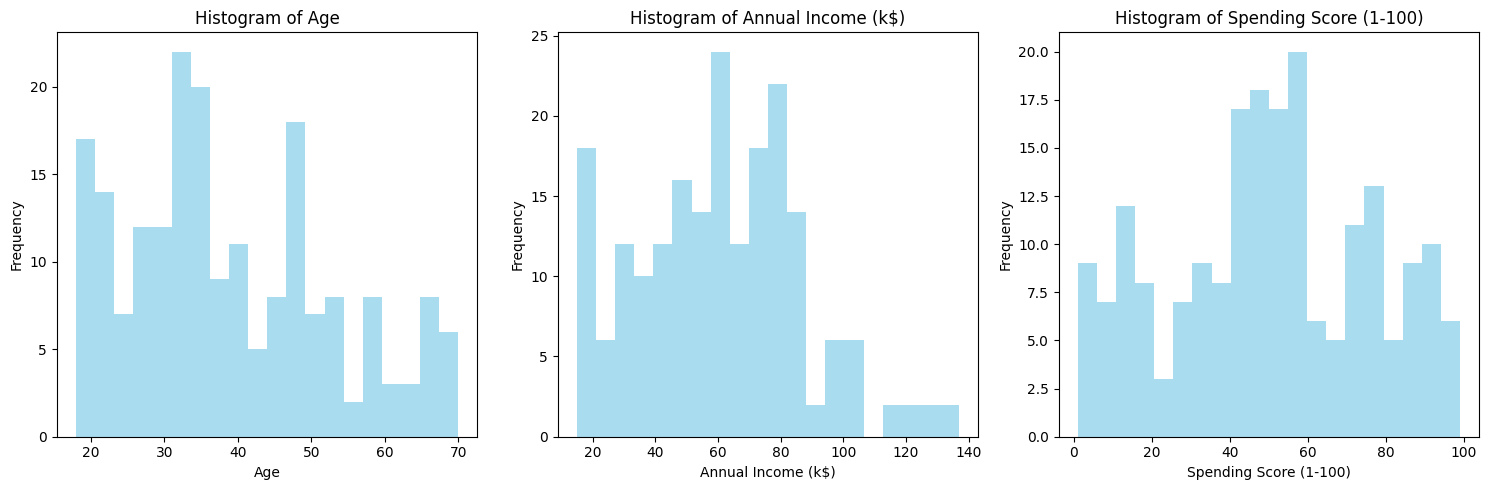

In [12]:
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(mall[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
from scipy import stats

for column in numerical_columns:
    skewness = stats.skew(mall[column])
    print(f'Skewness of {column}: {skewness:.2f}')

Skewness of Age: 0.48
Skewness of Annual Income (k$): 0.32
Skewness of Spending Score (1-100): -0.05


### as skewness is between -0.5 to 0.5 ; so data is not skewd 
### so good 

## let's check relationship or distribution of data with Scatterplot matrix

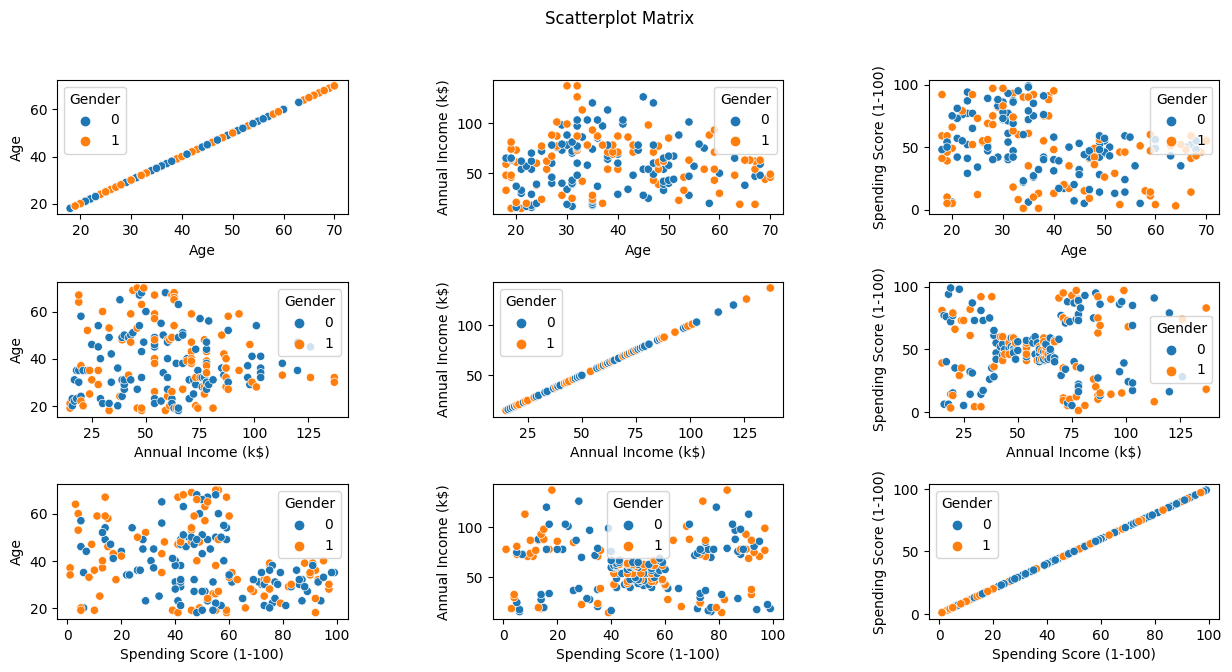

In [14]:
# Scatterplot Matrix
plt.figure(1, figsize=(15, 7))
for i, x in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    for j, y in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.scatterplot(x=x, y=y, data=mall, hue='Gender')
plt.suptitle('Scatterplot Matrix')
plt.show()

### as we did find out about OUTLIERS and SKEWNESS IN DATA above , with this distribution it is clear that the data is good 

## TASK : Machine Learning approach with clustering algorithm with elbow method

### Cluster Analysis: Age, Annual Income, and Spending Score 
### is the best as it provides a more comprehensive representation of data by incorporating three distinct features, enabling a deeper understanding of how these features collectively contribute to clustering patterns
### i really liked this one

In [15]:
# Cluster Analysis: Age and Spending Score
X1 = mall[['Age', 'Spending Score (1-100)']].values

In [16]:
# Finding the optimal number of clusters (Elbow Method)
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, random_state=111)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

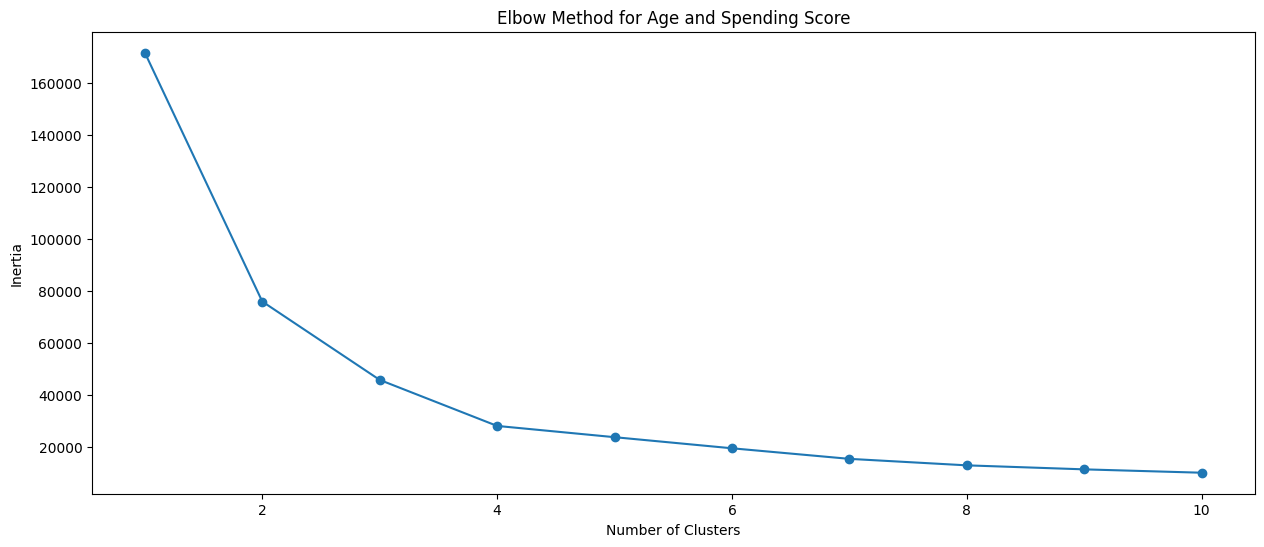

In [17]:
# Plotting the Elbow Method
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Age and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
# Clustering with K-Means
kmeans_age_spending = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=111)

kmeans_age_spending.fit(X1)
labels_age_spending = kmeans_age_spending.labels_
centroids_age_spending = kmeans_age_spending.cluster_centers_

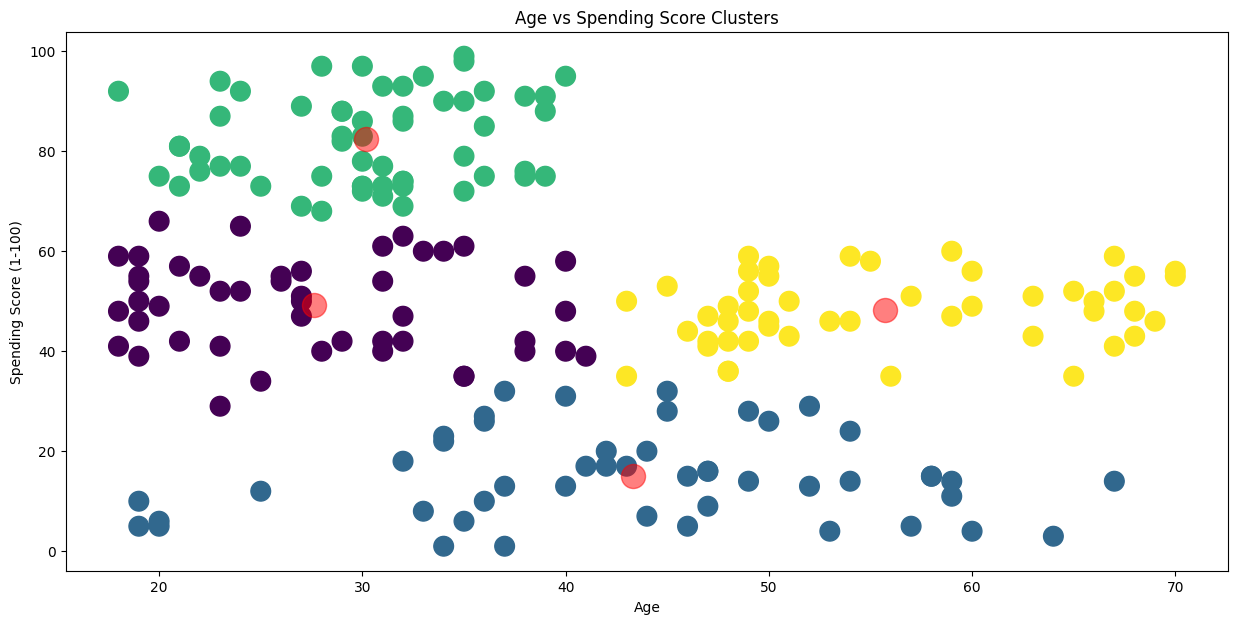

In [19]:
# Visualizing the clusters
plt.figure(1, figsize=(15, 7))
plt.scatter(X1[:, 0], X1[:, 1], c=labels_age_spending, s=200, cmap='viridis')
plt.scatter(centroids_age_spending[:, 0], centroids_age_spending[:, 1], s=300, c='red', alpha=0.5)
plt.title('Age vs Spending Score Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [20]:
# Cluster Analysis: Annual Income and Spending Score
X2 = mall[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [21]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++',n_init=10, random_state=111)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

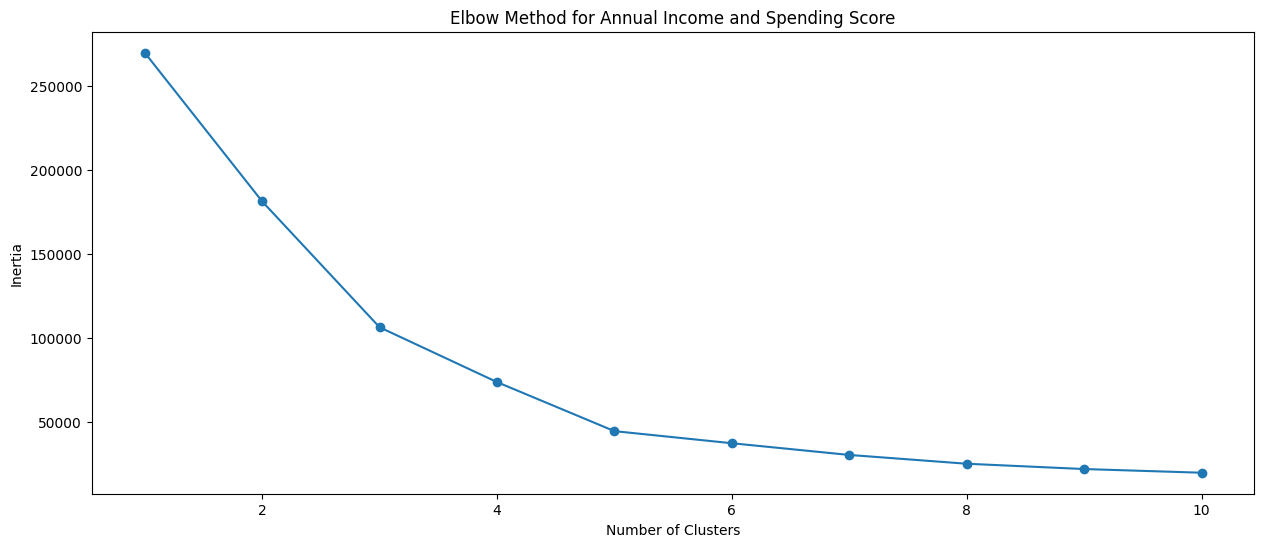

In [22]:
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Annual Income and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
kmeans_income_spending = KMeans(n_clusters=5, init='k-means++',n_init=10, random_state=111)
kmeans_income_spending.fit(X2)
labels_income_spending = kmeans_income_spending.labels_
centroids_income_spending = kmeans_income_spending.cluster_centers_

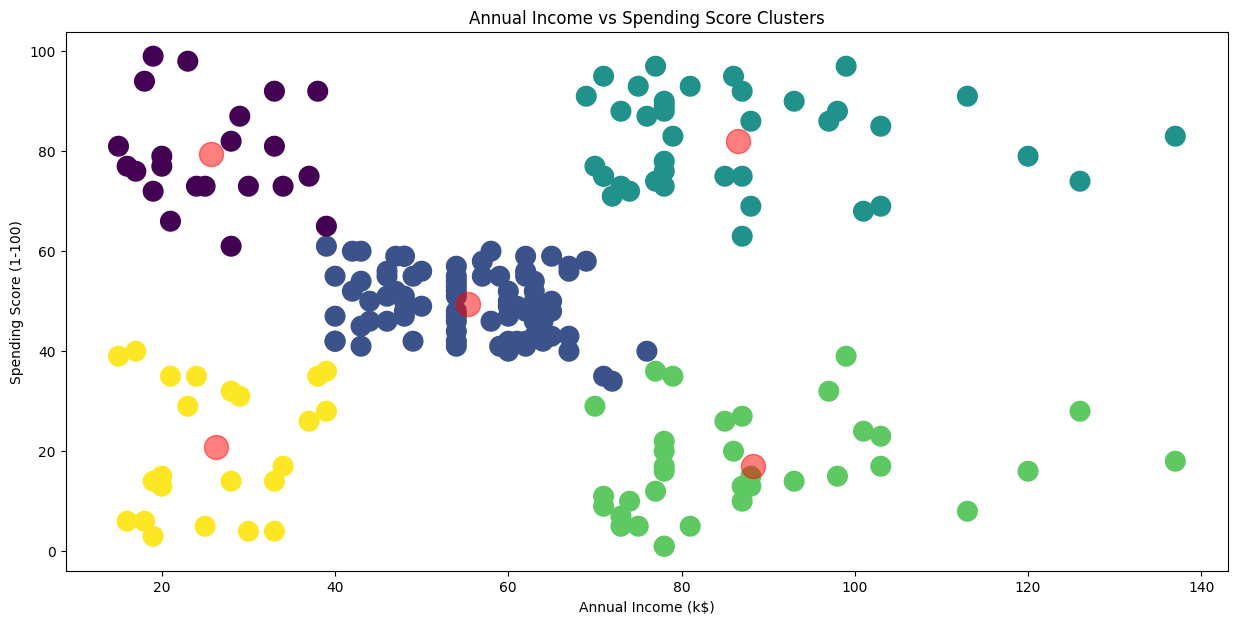

In [24]:
plt.figure(1, figsize=(15, 7))
plt.scatter(X2[:, 0], X2[:, 1], c=labels_income_spending, s=200, cmap='viridis')
plt.scatter(centroids_income_spending[:, 0], centroids_income_spending[:, 1], s=300, c='red', alpha=0.5)
plt.title('Annual Income vs Spending Score Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [25]:
# Cluster Analysis: Age, Annual Income, and Spending Score
X3 = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [26]:
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++',n_init=10, random_state=111)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

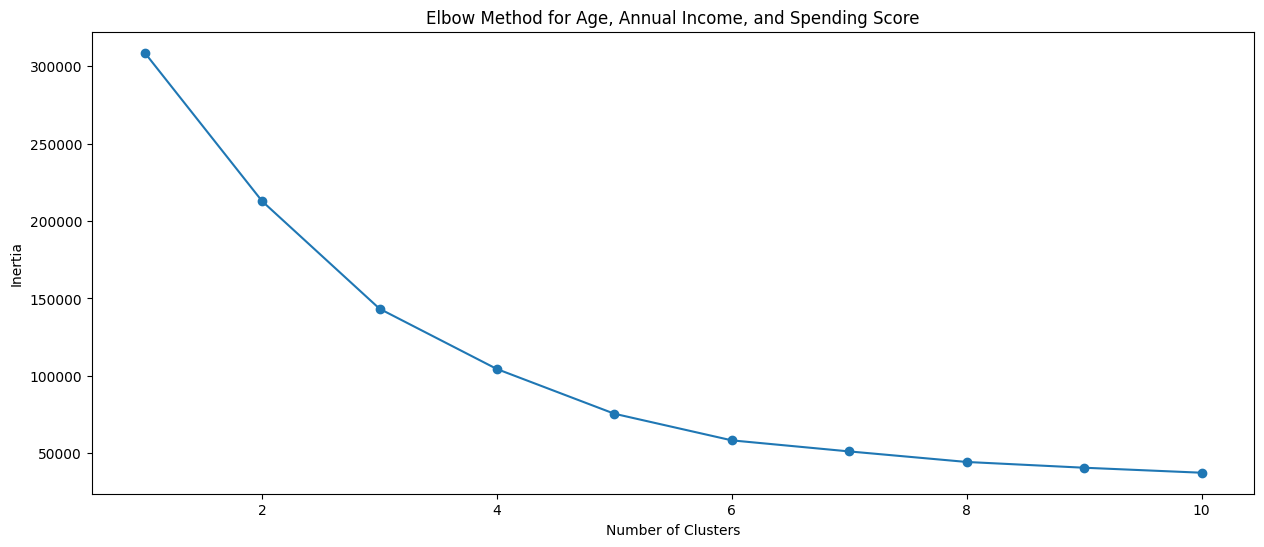

In [27]:
plt.figure(1, figsize=(15, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Age, Annual Income, and Spending Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
kmeans_combined = KMeans(n_clusters=6, init='k-means++',n_init=10, random_state=111)
kmeans_combined.fit(X3)
labels_combined = kmeans_combined.labels_
centroids_combined = kmeans_combined.cluster_centers_

In [29]:
# 3D Visualization of Clusters
fig = px.scatter_3d(mall, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)', color=labels_combined)
fig.update_layout(title='3D Clustering Visualization')
fig.show()

* 3D  visualization adds an additional dimension ('Annual Income (k$)')to the 2D scatterplot by representing it along the third axis
* It provides a more comprehensive view of the data 
*  And looks good too

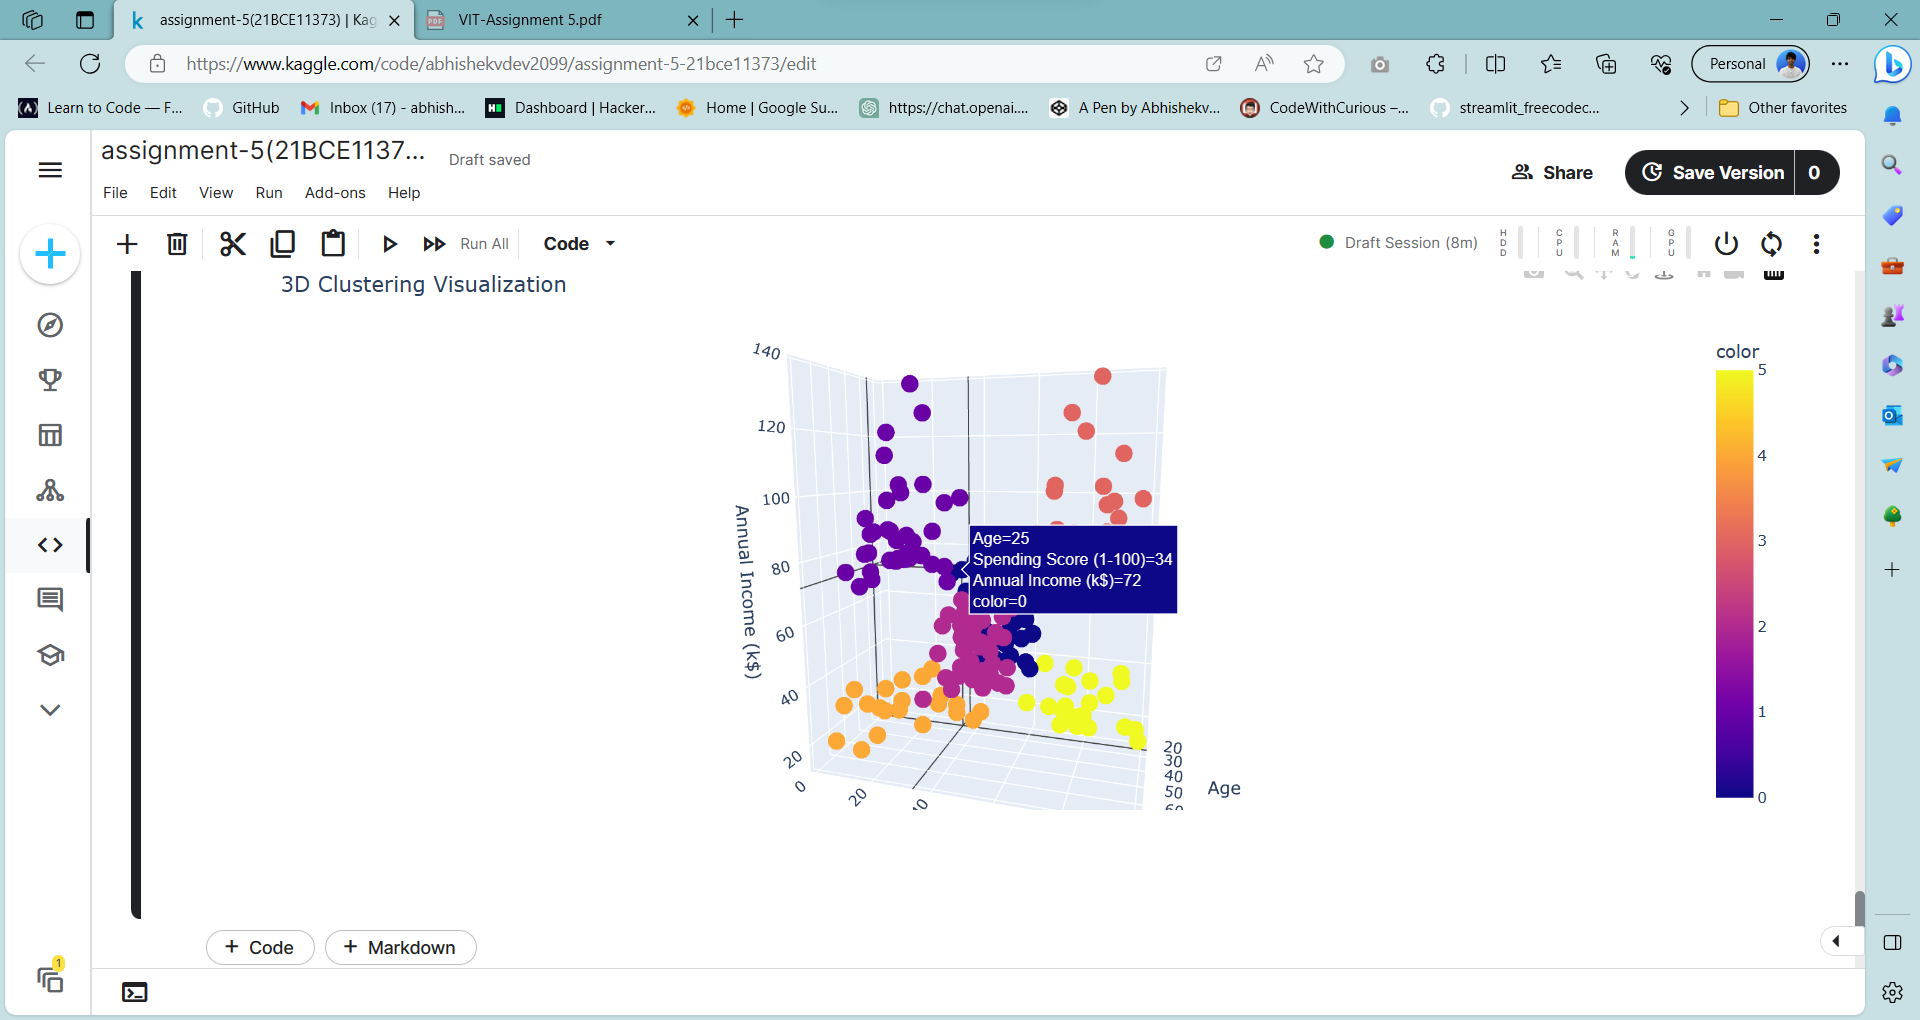

### ABHISHEK VIDHATE ( 21BCE11373 ) 
### EVENING BATCH 